In [189]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7
import glob
import sys
import time
from scipy import interpolate ,optimize, integrate
from scipy.interpolate import UnivariateSpline
import vegas
#look at fixing later 
import warnings
warnings.filterwarnings('ignore')

#import functions from file in path 
sys.path.insert(0, '/home/ben/Documents/Bonn-uni/internship/python_code/functions')
from functions2 import MS_finder2, integrate_imf

data_dir='/home/ben/Documents/Bonn-uni/internship/takeaway_data/' #'/users/bhastings/internship/data/MW/' # #

file_ext= '.dat2'

In [52]:
# sort file names so that they are listed by mass, then rotation velocity 
m_val=lambda x : int(x.split('/')[-1].split('.')[0].split('-')[0][1:])
v_val= lambda x : int(x.split('/')[-1].split('.')[0].split('-')[1])

s1=sorted(glob.glob(data_dir +'*'+ file_ext), key=v_val)
data_files=sorted(s1, key= m_val)


#cut stars heavier than 40M, at they do not contribute to Be
data_files=filter(lambda x: m_val(x) < 30, data_files)
#print data_files

mass_list=[]
for f in data_files:
    mass_list=np.append(mass_list, int(m_val(f)))
    
mass_list=np.unique(mass_list)


print 'masses of models :\n',mass_list

masses of models :
[ 3.  5.  7.  9. 10. 12. 15. 20. 25.]


In [53]:
data_df=pd.DataFrame()
i=0
for fil in data_files:
    message="working on file " +str(i) + " / "+ str(len(data_files)) #+ " :time loop "+str(i2) + " / "+ str(n_vals)
    sys.stdout.write ('\r'+ message)
    i=i+1
    df_ms, T_ms= MS_finder2(fil)
    

        # index of time closest to t 
        #T_indx=(df_ms['1:t[s]']-t).abs().argmin()
        #t_i=df_ms['1:t[s]'].loc[T_indx]
        #V= df_ms['9:v_surf[km/s]'].loc[T_indx] 
        #if star is rotating 
    if v_val(fil) != 0:
        V_over_Vcrit=df_ms['9:v_surf[km/s]']/ df_ms['8:v_crit[km/s]']
        #print V_over_Vcrit
        V_initial=df_ms['9:v_surf[km/s]'][0:100].mean()
        V_crit_initial=df_ms['8:v_crit[km/s]'][0:100].mean()
        crit_frac= V_initial/V_crit_initial
        V_crit=df_ms['8:v_crit[km/s]']
    else:
        V_over_Vcrit=0
        V_initial=0
        V=0
        crit_frac=0
        V_crit=0
    ti_over_tms=df_ms['1:t[s]']/T_ms

    #df_ms=df_ms.append(pd.DataFrame([[f_name,m,V_initial,V, T_ms,V_over_Vcrit, ti_over_tms]],
                                                      #columns=['f-name','M','V_initial', 'V', 'T_MS', 'V/Vcrit', 't_i/T_MS']))
    df_ms['V_crit']=V_crit
    df_ms['V/Vcrit']=V_over_Vcrit
    df_ms['t/Tms']=ti_over_tms
    df_ms['V_init']=V_initial
    df_ms['M']= m_val(fil)
    df_ms['V']=v_val(fil)
    df_ms['T_MS']= T_ms
    df_ms['V/Vc_initial']= crit_frac
    
    data_df=data_df.append(df_ms)

working on file 111 / 112

In [27]:
%matplotlib qt

df=data_df[data_df['1:t[s]']== 0]


#print df[['V_init','M','T_MS' ]].to_string()
x=np.array(df['V_init'])#[-20:]
y=np.array(df['M'])#[-20:]
z=np.array(df['T_MS'])#[-20:]

        #print x,y,z
f = interpolate.interp2d(x, y, z, kind='cubic', bounds_error=True)

m_list=np.linspace(3,mass_list.max(),500)
pl_arr=[]
for i in m_list:
    #plt.plot(i, (f(420,i)), 'k.' )
    #plt.plot(i, (f(0,i))/1e6, 'b.' )
    pl_arr=np.append(pl_arr, [i,(f(0,i)) ])
plt.plot(pl_arr[0::2],pl_arr[1::2]/1e6 )

pl_arr=[]
for i in m_list:
    #plt.plot(i, (f(420,i)), 'k.' )
    #plt.plot(i, (f(0,i))/1e6, 'b.' )
    pl_arr=np.append(pl_arr, [i,(f(300,i)) ])
plt.plot(pl_arr[0::2],pl_arr[1::2]/1e6 )


plt.plot(y,z/1e6, 'ro')
plt.show()

       V_init  M         T_MS
0    0.000000  3  325401000.0
0   57.577090  3  327325000.0
0  115.711276  3  326126000.0
0  173.712179  3  332907000.0
0  232.914483  3  335239000.0
0  295.196571  3  338809000.0
0  357.405975  3  342392000.0
0  416.353773  3  351943000.0
0  448.484790  3  357962000.0
0  468.589917  3  388098000.0
0  467.990613  3  393089000.0
0  467.866638  3  399784000.0
0    0.000000  5   92886100.0
0   56.446956  5   93523200.0
0  113.159863  5   94060600.0
0  169.882102  5   94755700.0
0  227.148670  5   95709200.0
0  285.114061  5   97204100.0
0  343.948756  5   98293600.0
0  403.567191  5  100985000.0
0  459.596940  5  104099000.0
0  502.320325  5  107957000.0
0  525.454800  5  117488000.0
0  525.851809  5  121217000.0


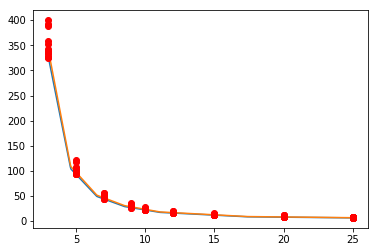

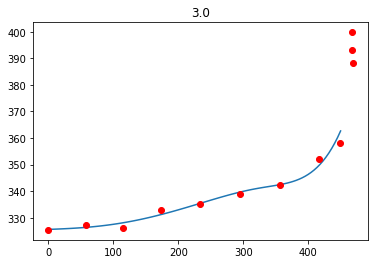

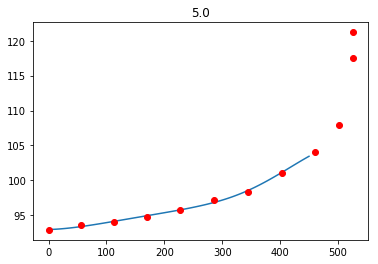

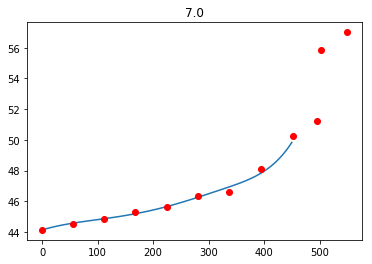

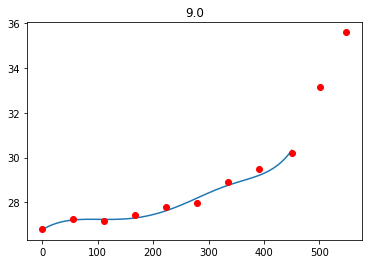

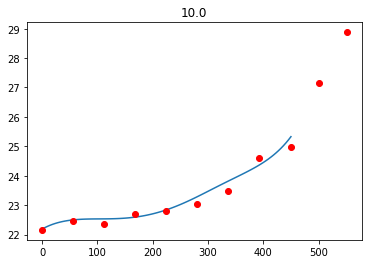

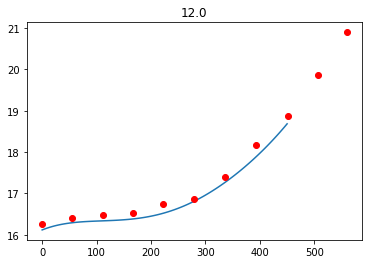

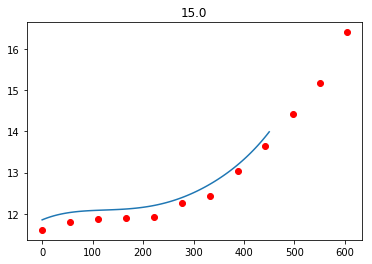

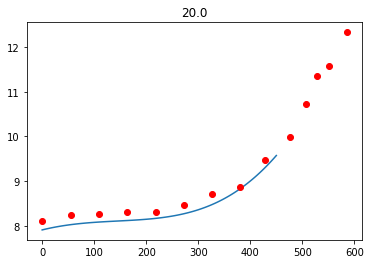

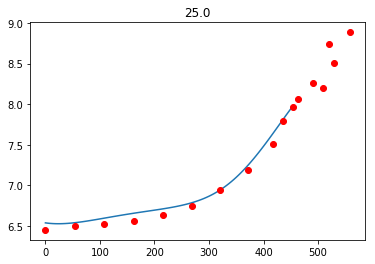

In [56]:
%matplotlib inline

df=data_df[data_df['1:t[s]']== 0]


#print df[['V_init','M','T_MS' ]].to_string()
x=np.array(df['V_init'])#[-20:]
y=np.array(df['M'])#[-20:]
z=np.array(df['T_MS'])#[-20:]

        #print x,y,z
f = interpolate.SmoothBivariateSpline(x, y, z, kx=4, ky=1 )#, kind='cubic', bounds_error=True)

m_list=np.linspace(3,mass_list.max(),500)
pl_arr=[]
for i in m_list:
    #plt.plot(i, (f(420,i)), 'k.' )
    #plt.plot(i, (f(0,i))/1e6, 'b.' )
    pl_arr=np.append(pl_arr, [i,(f(0,i)) ])
plt.plot(pl_arr[0::2],pl_arr[1::2]/1e6 )

pl_arr=[]
for i in m_list:
    #plt.plot(i, (f(420,i)), 'k.' )
    #plt.plot(i, (f(0,i))/1e6, 'b.' )
    pl_arr=np.append(pl_arr, [i,(f(300,i)) ])
plt.plot(pl_arr[0::2],pl_arr[1::2]/1e6 )


plt.plot(y,z/1e6, 'ro')
plt.show()

v_vals=np.linspace(0,450,100)

for m in mass_list:
    pl_arr=[]
    for v in v_vals: 
        pl_arr=np.append(pl_arr, [v,(f(v,m)) ])

    plt.plot(pl_arr[0::2],pl_arr[1::2]/1e6, label=m )
    
    x=np.array(df['V_init'][df.M==m])#[-20:]
    y=np.array(df['M'][df.M==m])#[-20:]
    z=np.array(df['T_MS'][df.M==m])#[-20:]
    plt.title(m)
    plt.plot(x,z/1e6, 'ro')
    plt.show()

In [63]:
# v-T interpolation 
df=data_df[data_df['1:t[s]']== 0]

v_T_interp={}
for m in mass_list: 
    x=np.array(df['V_init'][df.M==m])#[-20:]
    y=np.array(df['M'][df.M==m])#[-20:]
    z=np.array(df['T_MS'][df.M==m])#[-20:]
    
    func=interpolate.interp1d(x,z,bounds_error=False, assume_sorted=True)
    v_T_interp[m]=func
    
    
# plot interpolation 
plotVT= False
if plotVT == True:
    for m in mass_list: 
        x=np.linspace(0,600,100)
        y=v_T_interp[m](x)
        plt.plot(x,y/1e6)

        x=np.array(df['V_init'][df.M==m])#[-20:]
        y=np.array(df['M'][df.M==m])#[-20:]
        z=np.array(df['T_MS'][df.M==m])#[-20:]

        plt.plot(x,z/1e6, 'ro')

        plt.title(m)
        plt.xlabel('V/kms-1')
        plt.ylabel('Tms/Myr')
        plt.show()




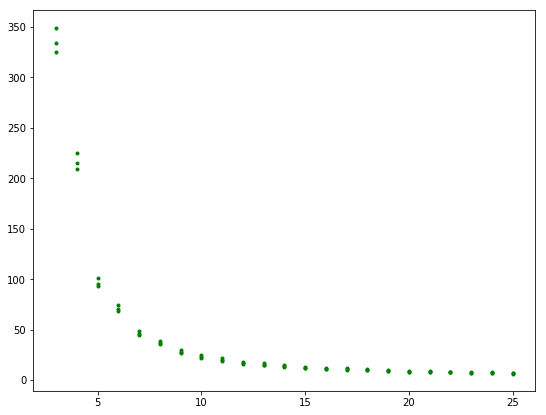

In [92]:
# M-T interpolation 
M_T_interp={}
#for m in mass_list: 
df=data_df[(data_df['1:t[s]']== 0) &(data_df['M']==m)]
for v in [0,200,400]:
    x= mass_list
    y=map((lambda u: v_T_interp[u](v)),x)#v_T_interp[m](v)
    #z=np.array(df['T_MS'][df.M==m])#[-20:]

    func=interpolate.interp1d(x,y,bounds_error=False, assume_sorted=True)
    M_T_interp[v]=func
    
    
for m in np.linspace(0,25,26):#v_T_interp.keys():
    for v in M_T_interp.keys():
        #print m,v
        y= M_T_interp[v](m)
        #y= v_T_interp[m](v)
        plt.plot(m, M_V_T_interp(m,v)/1e6, 'g.')
        
plt.show()

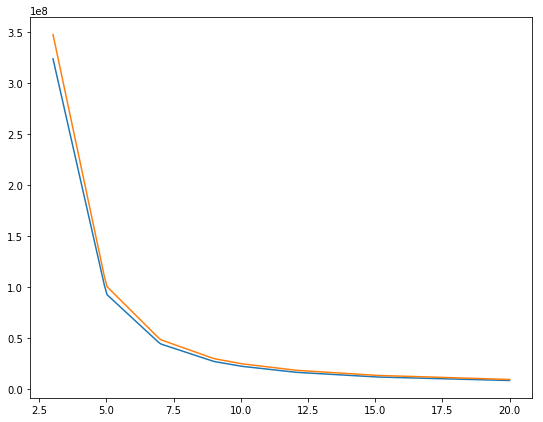

In [95]:
def M_V_T_interp(M, V):
    x= mass_list
    y=map((lambda u: v_T_interp[u](V)),x)#v_T_interp[m](v)
    
    func=interpolate.interp1d(x,y,bounds_error=False, assume_sorted=True)
    
    return func(M)
   


for v_val in [0,400]:
    m_vals= np.linspace(0,20,200)
    y=map(lambda w: M_V_T_interp(w,v_val),m_vals)
    plt.plot(m_vals, y )
    
plt.show()

# calculate maximum mass still on MS at anytime # 

In [201]:
t= 10e6 
v_maximum=500
#for m in np.linspace(mass_list.min(), mass_list.max()):
#    print t/M_V_T_interp(m, v_maximum)

    
print '##########'
mass_vals=pd.Series(np.linspace(mass_list.min(), mass_list.max(), 100 ))
frac_lifetimes= pd.Series(map(lambda r: t/M_V_T_interp(r, v_maximum), mass_vals))

T_df= pd.concat([frac_lifetimes, mass_vals], axis=1)

#print (T_df[0]-1).abs().argmin()
#print T_df[1].iloc[(T_df[0]-1).abs().argmin()]

#print T_df

#print (frac_lifetimes-1).abs().min()

def M_max_calculator(t, v_maximum, largest_m):
    if t==0: 
        return largest_m
    mass_vals=pd.Series(np.linspace(mass_list.min(), largest_m, 1+1e3 ))
    frac_lifetimes= pd.Series(map(lambda r: t/M_V_T_interp(r, v_maximum), mass_vals))

    T_df= pd.concat([frac_lifetimes, mass_vals], axis=1)

    #get index of mass with t/T closest to 1 
    #print (T_df[0]-1).abs().argmin()
    return T_df[1].iloc[(T_df[0]-1).abs().argmin()]

##########


In [202]:
def V_min_calculator(t,m, v_maximum):
    
    #if non-rotating star is still MS, vmin is 0 
    
    if t/M_V_T_interp(m, 0) <1 : 
        return 0 
    
    #if fastest rotating star is not MS, return nan
    if t/M_V_T_interp(m, v_maximum) > 1 : 
        return np.nan
    
    
    v_vals=pd.Series(np.linspace(0,v_maximum,1+1e3))
    frac_lifetimes= pd.Series(map(lambda r: t/M_V_T_interp(m, r), v_vals))
    
    T_df= pd.concat([frac_lifetimes, v_vals], axis=1)
    
    
    return T_df[1].iloc[(T_df[0]-1).abs().argmin()]
    

In [196]:
print V_min_calculator(7e6, 25, 500)

332.0


In [197]:

v_maximum=500.0
vdist=lambda x: 1.0/v_maximum


def integrate_vdist(v1,v2, vdist):
    
    if v1 < 0: 
        v1=0 
    
    if v2 > v_maximum:
        v2=v_maximum
        
    if np.isnan(v1):
        return 0 
    
    return integrate.quad(vdist, v1, v2)[0]


print integrate_vdist(200,600, vdist)

0.6


In [198]:
#check that total CDF between mass limits is 1. If not eta0 value needs to be tweaked! 
global alpha, eta0
alpha=2.3
lower= 3
upper =mass_list.max()
eta0=1 / integrate_imf(lower,upper, alpha,1)


print "integral of IMF between ", lower,'and', upper, ',eta0 = ', eta0, ":"
print integrate_imf(lower , upper , alpha , eta0)

integral of IMF between  3 and 25.0 ,eta0 =  5.790341542513436 :
1.0


In [237]:
def integrand_N(x):
   
    m=x[0]
    V_min= V_min_calculator(t,m, v_maximum)
    i=integrate_vdist(V_min ,v_maximum, vdist)/integrate_vdist(0 ,v_maximum, vdist)
        
    i1=eta0 * m**-alpha
    
    #print 'V_min=', V_min,'i',i, 'm=',np.round(m, 2),  't=', np.round(t/1e6,2), 'i= ', i
    #print m
    return i*i1


t=0
s=0

m=12
print integrand_N([m,0])
    


0.01908039298792009


In [240]:
print 'STARTING'
df_N=pd.DataFrame()
start_time=time.time()
for t in (0,2,5, 20, 50, 100):
    t=t*1e6
    M_max=M_max_calculator(t, v_maximum, 25)
    integ = vegas.Integrator([[3,M_max], [0,1]])
    result_N = integ(integrand_N, nitn=5, neval=2e3)
    print t/1e6,np.round(M_max,3), np.round(result_N.val,5)
    df_N=df_N.append(pd.DataFrame([[t,result_N.val]], columns=['t', 'f']))
print '\ntime taken (mins)= ',   (time.time()- start_time)/60

STARTING
0.0 25 1.00051
2.0 25.0 0.99965
5.0 25.0 0.99988
20.0 11.932 0.87261
50.0 7.4 0.70466
100.0 5.288 0.51806

time taken (mins)=  5.32001513243
